<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/01_Introduction_to_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAE 5020 — Data-Driven Methods in Aerospace Engineering  
## Notebook 01: Introduction to Python (Colab-ready)

**Instructor:** Dr. Kursat Kara  
**Term:** Spring 2026  
**Last updated:** Jan 12, 2026

### Learning objectives
By the end of this notebook, you will be able to:
1. Run and edit Python code in Google Colab
2. Use core Python types and control flow (lists, loops, conditionals)
3. Use **NumPy arrays** for numerical computing (vectorization, slicing, masking, shapes)
4. Plot data with **matplotlib**
5. Fit and evaluate a simple model from data (least-squares regression)


### Workflow + submission (typical)
- **Reproducibility:** Runtime → *Restart runtime*, then Runtime → *Run all*
- **Submission:** File → Download → **.ipynb** (and export PDF if requested)
- Keep code + short written answers **in Markdown cells** for exercises.


In [ ]:
# Notebook setup (run once)
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.rcParams["figure.dpi"] = 120

# For reproducible demos/exercises that use randomness
np.random.seed(0)

print("NumPy version:", np.__version__)


NumPy version: 2.0.2


## 1) Python basics: variables and types
Python is **dynamically typed**: a variable name can refer to values of different types.


In [ ]:
my_string = "Hello, MAE 5020"
my_integer = 5
my_float = 3.14159
my_boolean = True

for x in [my_string, my_integer, my_float, my_boolean]:
    print(f"value={x!r:>14} | type={type(x)}")


value='Hello, MAE 5020' | type=<class 'str'>
value=             5 | type=<class 'int'>
value=       3.14159 | type=<class 'float'>
value=          True | type=<class 'bool'>


### Casting (type conversion)


In [ ]:
print(int(3.9))         # truncates toward zero
print(float("2.5"))     # string -> float
print(str(10))          # number -> string


3
2.5
10


## 2) Arithmetic (and a common pitfall)
Avoid naming variables after built-in functions (e.g., do **not** use `sum` as a variable).


In [ ]:
a = 15
b = 4

s = a + b          # don't name this variable `sum`
diff = a - b
prod = a * b
quot = a / b       # true division -> float
floordiv = a // b  # floor division -> int (for ints)
rem = a % b
power = a ** b

print("a+b  =", s)
print("a-b  =", diff)
print("a*b  =", prod)
print("a/b  =", quot)
print("a//b =", floordiv)
print("a%b  =", rem)
print("a**b =", power)


a+b  = 19
a-b  = 11
a*b  = 60
a/b  = 3.75
a//b = 3
a%b  = 3
a**b = 50625


## 3) Strings and formatting


In [ ]:
name = "NACA 0012"
alpha_deg = 5.25

print("Airfoil: " + name)
print(f"Angle of attack = {alpha_deg:.2f} deg")  # f-string formatting


Airfoil: NACA 0012
Angle of attack = 5.25 deg


## 4) Lists (Python’s basic container)
Lists are flexible, but they are not optimized for numerical computing.


In [ ]:
fruits = ["apple", "banana", "cherry"]
print(fruits)
print("first item:", fruits[0])
print("last item :", fruits[-1])

fruits.append("orange")
print("after append:", fruits)


['apple', 'banana', 'cherry']
first item: apple
last item : cherry
after append: ['apple', 'banana', 'cherry', 'orange']


## 5) Loops and conditionals


In [ ]:
# Loop example
for fruit in fruits:
    print("fruit:", fruit)

# Conditional example (aerospace-flavored)
for Mach in [0.8, 2.0, 7.0]:
    if Mach < 1.0:
        regime = "subsonic"
    elif Mach < 5.0:
        regime = "supersonic"
    else:
        regime = "hypersonic"
    print(f"Mach {Mach:>3} -> {regime}")


fruit: apple
fruit: banana
fruit: cherry
fruit: orange
Mach 0.8 -> subsonic
Mach 2.0 -> supersonic
Mach 7.0 -> hypersonic


## 6) Functions (write reusable code)


In [ ]:
def dynamic_pressure(rho: float, V: float) -> float:
    """Compute dynamic pressure q = 0.5 * rho * V^2."""
    return 0.5 * rho * V**2

rho = 1.225   # kg/m^3
V = 100.0     # m/s
print("q =", dynamic_pressure(rho, V), "Pa")


q = 6125.0 Pa


## 7) NumPy: the core tool for data-driven engineering
NumPy arrays enable **vectorized** operations (fast, concise, less error-prone).


In [ ]:
# Python list
x_list = [0, 1, 2, 3, 4]
print("list:", x_list, "type:", type(x_list))

# NumPy array
x = np.array(x_list, dtype=float)
print("array:", x, "type:", type(x), "dtype:", x.dtype)

# Vectorized operations
print("x**2 :", x**2)
print("sin(x):", np.sin(x))

# Broadcasting
print("x + 10:", x + 10)

# Boolean masking
print("x > 2:", x[x > 2])


list: [0, 1, 2, 3, 4] type: <class 'list'>
array: [0. 1. 2. 3. 4.] type: <class 'numpy.ndarray'> dtype: float64
x**2 : [ 0.  1.  4.  9. 16.]
sin(x): [ 0.      0.8415  0.9093  0.1411 -0.7568]
x + 10: [10. 11. 12. 13. 14.]
x > 2: [3. 4.]


### Shapes, dimensions, and broadcasting (common source of bugs)


In [ ]:
x = np.arange(5.0)           # shape (5,)
print("x.shape   =", x.shape, "ndim =", x.ndim)
print(x)

col = x[:, None]             # shape (5,1) "column vector"
row = x[None, :]             # shape (1,5) "row vector"

print("col.shape =", col.shape, "ndim =", col.ndim)
print(col)
print("row.shape =", row.shape, "ndim =", row.ndim)
print(row)

# Broadcasting example: (5,1) + (1,5) -> (5,5)
M = col + row
print("M.shape   =", M.shape)
print(M)


x.shape   = (5,) ndim = 1
[0. 1. 2. 3. 4.]
col.shape = (5, 1) ndim = 2
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
row.shape = (1, 5) ndim = 2
[[0. 1. 2. 3. 4.]]
M.shape   = (5, 5)
[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]
 [4. 5. 6. 7. 8.]]


### Loop vs vectorization (preferred)


In [ ]:
# Loop approach (works, but slower and more verbose)
y_loop = []
for xi in x:
    y_loop.append(xi**2 + 2*xi + 1)
y_loop = np.array(y_loop)

# Vectorized approach (preferred)
y_vec = x**2 + 2*x + 1

print("y_loop:", y_loop)
print("y_vec :", y_vec)
print("same? :", np.allclose(y_loop, y_vec))


y_loop: [ 1.  4.  9. 16. 25.]
y_vec : [ 1.  4.  9. 16. 25.]
same? : True


## 8) Plotting quickstart (matplotlib)


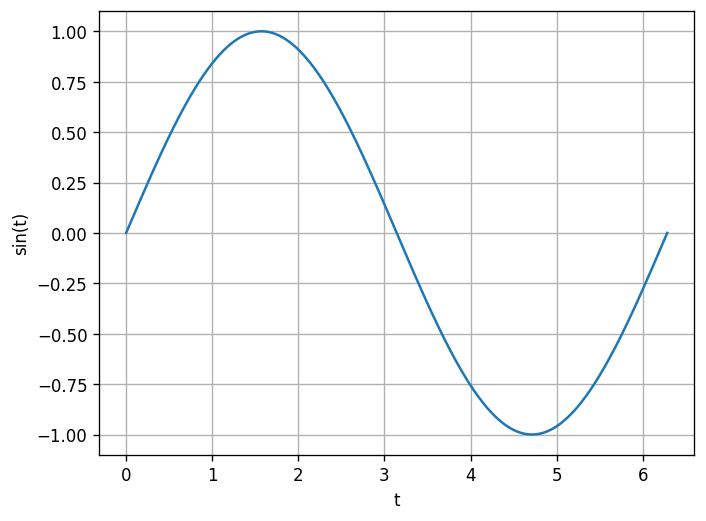

In [ ]:
t = np.linspace(0, 2*np.pi, 400)
signal = np.sin(t)

plt.figure()
plt.plot(t, signal)
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.grid(True)
plt.show()


## 9) Loading data (mini example)
Real workflows start by **reading data**, selecting columns, and plotting.
Below we simulate a small CSV dataset (time, velocity) and load it.


t: [0.  0.5 1.  1.5 2.  2.5 3. ]
V: [10.  12.2 14.1 13.7 15.5 16.  15.2]
mean(V) = 13.814285714285715 std(V) = 2.1129983210504224


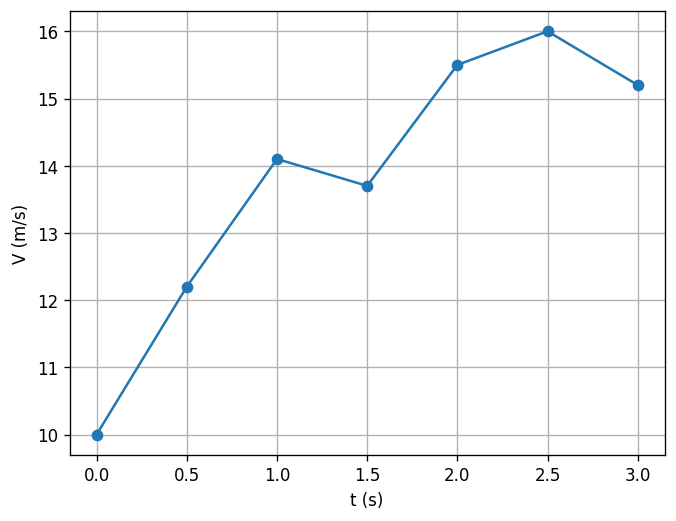

In [ ]:
import io

csv_text = """t,V
0.0,  10.0
0.5,  12.2
1.0,  14.1
1.5,  13.7
2.0,  15.5
2.5,  16.0
3.0,  15.2
"""

data = np.genfromtxt(io.StringIO(csv_text), delimiter=",", names=True)
t = data["t"]
V = data["V"]

print("t:", t)
print("V:", V)
print("mean(V) =", V.mean(), "std(V) =", V.std(ddof=1))

plt.figure()
plt.plot(t, V, "o-")
plt.xlabel("t (s)")
plt.ylabel("V (m/s)")
plt.grid(True)
plt.show()


## 10) Mini aerospace example: fit a lift curve using least squares
We fit a simple model: **CL ≈ a0 + a1 · α(deg)**.

> **Physics guardrail:** This linear model is usually reasonable only for *small angles* (pre-stall).  
> Treat extrapolation with caution.


Fitted model: CL ≈ 0.0086 + 0.0814 * alpha_deg
RMSE = 0.0144,  R^2 = 0.9980


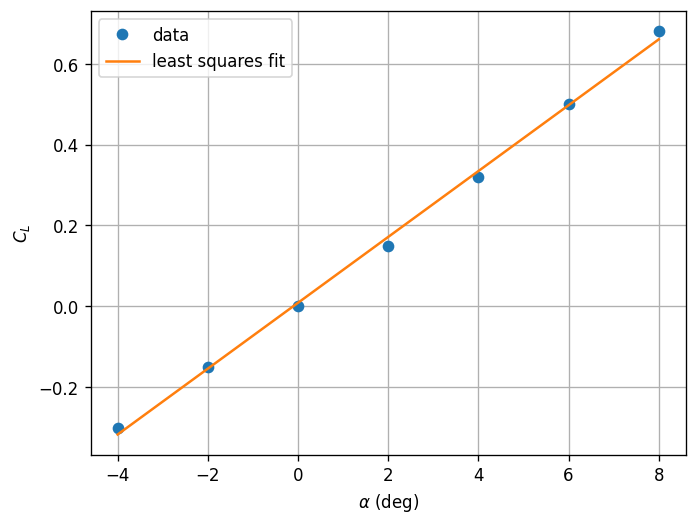

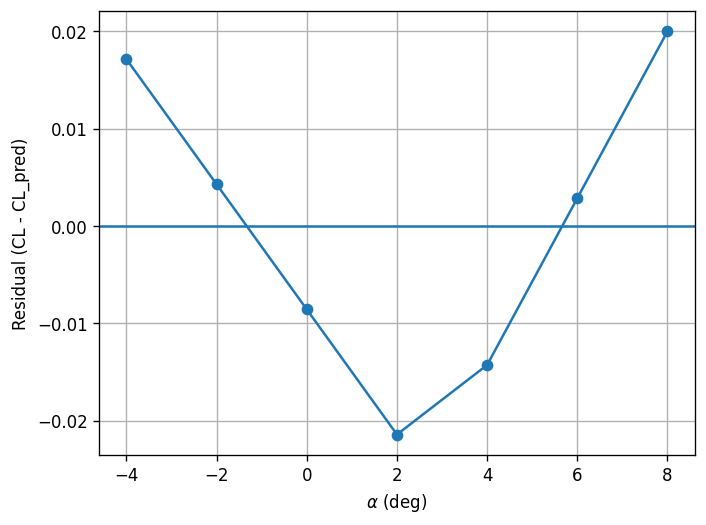

In [ ]:
alpha_deg = np.array([-4, -2, 0, 2, 4, 6, 8], dtype=float)
CL = np.array([-0.30, -0.15, 0.00, 0.15, 0.32, 0.50, 0.68], dtype=float)

# Build design matrix A = [1, alpha]
A = np.column_stack([np.ones_like(alpha_deg), alpha_deg])

coef, *_ = np.linalg.lstsq(A, CL, rcond=None)  # [a0, a1]
a0, a1 = coef

CL_pred = A @ coef
resid = CL - CL_pred
rmse = np.sqrt(np.mean(resid**2))

# R^2
ss_res = np.sum(resid**2)
ss_tot = np.sum((CL - CL.mean())**2)
r2 = 1 - ss_res/ss_tot

print(f"Fitted model: CL ≈ {a0:.4f} + {a1:.4f} * alpha_deg")
print(f"RMSE = {rmse:.4f},  R^2 = {r2:.4f}")

alpha_plot = np.linspace(alpha_deg.min(), alpha_deg.max(), 200)
CL_fit = a0 + a1 * alpha_plot

plt.figure()
plt.plot(alpha_deg, CL, "o", label="data")
plt.plot(alpha_plot, CL_fit, "-", label="least squares fit")
plt.xlabel(r"$\alpha$ (deg)")
plt.ylabel(r"$C_L$")
plt.grid(True)
plt.legend()
plt.show()

# Residual plot (model diagnostics)
plt.figure()
plt.axhline(0.0)
plt.plot(alpha_deg, resid, "o-")
plt.xlabel(r"$\alpha$ (deg)")
plt.ylabel("Residual (CL - CL_pred)")
plt.grid(True)
plt.show()


**This repo has Matplotlib styles to format your figures for scientific papers, presentations and theses**.

https://github.com/garrettj403/SciencePlots


In [ ]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

ModuleNotFoundError: No module named 'scienceplots'

In [ ]:
pip install SciencePlots

In [ ]:
import matplotlib.pyplot as plt
import scienceplots


In [ ]:
plt.style.use(["science"])

def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

pparam = dict(xlabel="Voltage (mV)", ylabel=r"Current ($\mu$A)")

x = np.linspace(0.75, 1.25, 201)


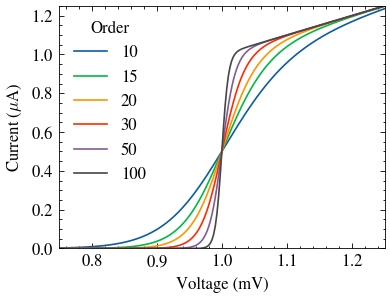

In [ ]:
# %%
# Styles 'science', 'no-latex'
with plt.style.context(["science","no-latex"]):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title="Order")
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig("fig01b.jpg", dpi=300)
    plt.show()
    plt.close()

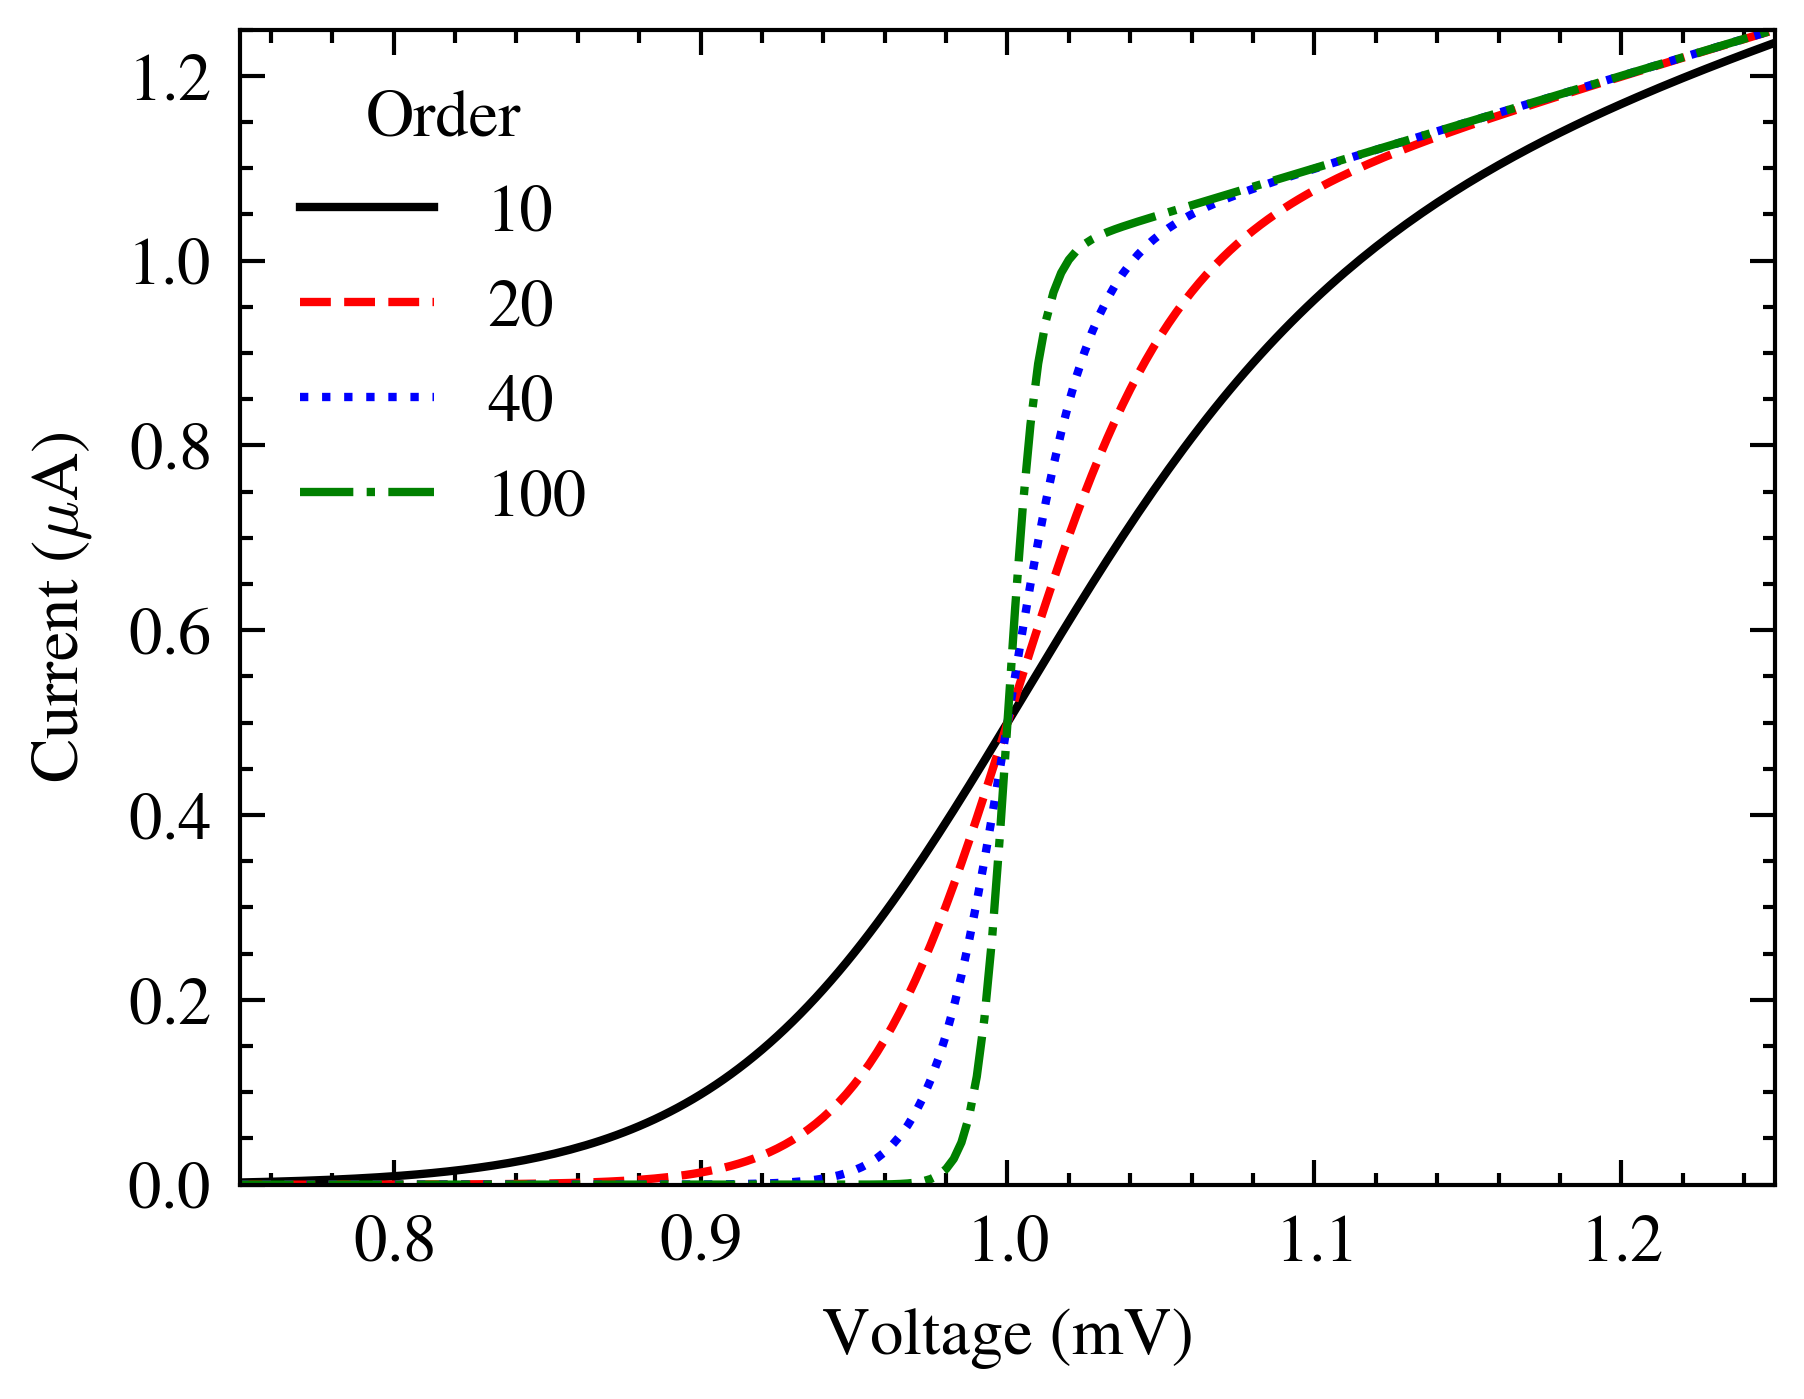

In [ ]:
# %%
# Styles 'science', 'ieee'
with plt.style.context(["science", "ieee","no-latex"]):
    fig, ax = plt.subplots()
    for p in [10, 20, 40, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title="Order")
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig("fig02a.jpg", dpi=300)
    plt.show()
    plt.close()

## 11) Exercises (submit solutions in your own copy)
1. Create `alpha_deg = np.arange(-5, 16, 1)` and compute `alpha_rad`.
2. Create an array `M = np.linspace(0.2, 3.0, 15)`. Use a boolean mask to select values where `M > 1`.
3. Write a function `mach_angle_deg(M)` that returns the Mach angle μ in degrees for M>1.
4. Given noisy data `CL_noisy = CL + 0.02*np.random.randn(CL.size)`, refit and compare slopes, RMSE, and R².
5. Modify the CSV mini example: add a third column (e.g., `rho`) and compute dynamic pressure `q(t)`.
6. Make plots using SciencePlots.

